#  Model Experimentation Notebook
This notebook explores the output from the Isolation Forest anomaly detection model.
- Visualizes anomalies
- Explores anomaly distribution
- Performs basic analysis on detected anomalies

In [17]:
# Load dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='whitegrid')

In [18]:
# Load anomaly detection report
df = pd.read_csv("source/anomaly_detection_report.csv")
df.head()

,@timestamp,Platform-TenantId,url,status,anomaly_label,anomaly_ground_truth
0,2025-04-07 10:00:00+00:00,jupiter,/channel/transfer,FORBIDDEN,anomaly,normal
1,2025-04-07 10:00:01+00:00,wakanda,/channel/transfer,TIMEOUT,normal,normal
2,2025-04-07 10:00:02+00:00,gorilla,/channel/transfer,SUCCESS,normal,normal
3,2025-04-07 10:00:06+00:00,venus,/channel/transfer,SUCCESS,normal,normal
4,2025-04-07 10:00:04+00:00,gorilla,/channel/transfer,SUCCESS,normal,normal


In [19]:
# Convert timestamp to datetime
df['@timestamp'] = pd.to_datetime(df['@timestamp'])
df['hour'] = df['@timestamp'].dt.hour

##  Anomaly Distribution

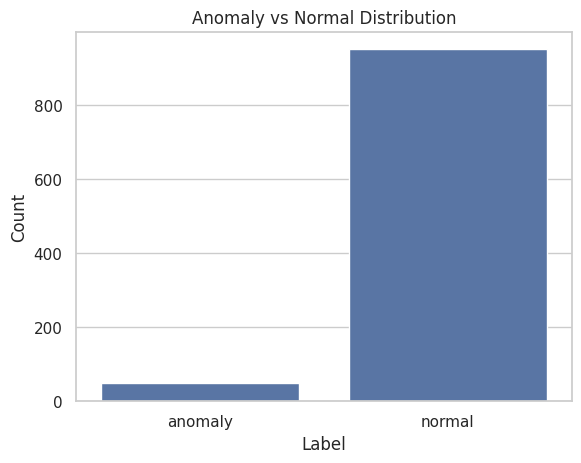

In [20]:
# Count of anomalies vs normal
sns.countplot(x='anomaly_label', data=df)
plt.title("Anomaly vs Normal Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

## Anomalies over Time

/tmp/ipykernel_87663/2294680395.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[df['anomaly_label'] == 'anomaly'].set_index('@timestamp')['Platform-TenantId'].resample('1H').count().plot(kind='bar', figsize=(12,6))


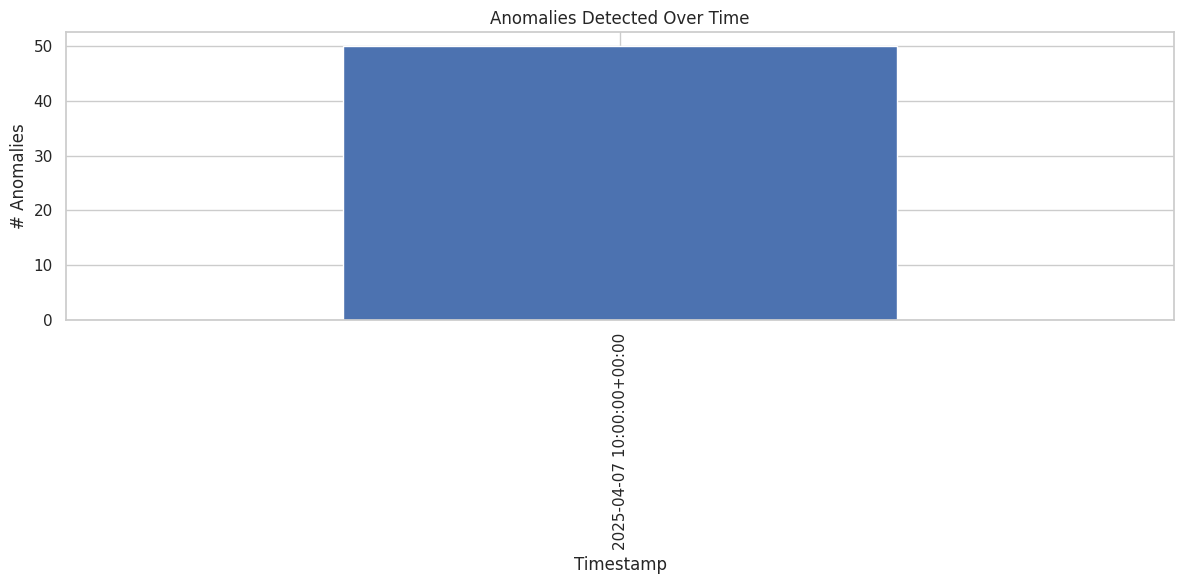

In [21]:
# Visualize when anomalies occurred
df[df['anomaly_label'] == 'anomaly'].set_index('@timestamp')['Platform-TenantId'].resample('1H').count().plot(kind='bar', figsize=(12,6))
plt.title("Anomalies Detected Over Time")
plt.xlabel("Timestamp")
plt.ylabel("# Anomalies")
plt.tight_layout()
plt.show()

=== Classification Report ===
              precision    recall  f1-score   support

     anomaly       0.06      0.06      0.06        54
      normal       0.95      0.95      0.95       946

    accuracy                           0.90      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.90      0.90      0.90      1000



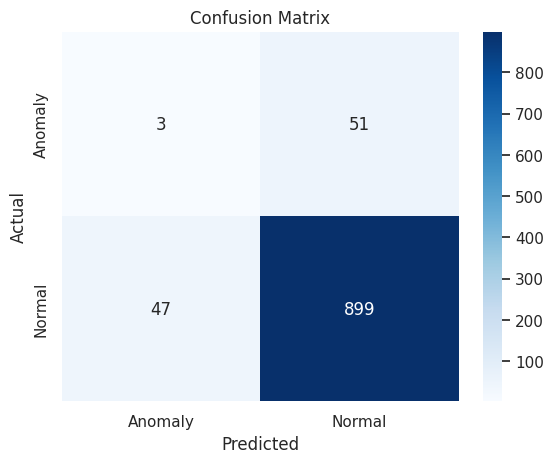

In [22]:
df = pd.read_csv("source/anomaly_detection_report.csv")

# Report
print("=== Classification Report ===")
print(classification_report(df['anomaly_ground_truth'], df['anomaly_label']))

# Confusion Matrix
cm = confusion_matrix(df['anomaly_ground_truth'], df['anomaly_label'], labels=['anomaly', 'normal'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()